In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('03_Clustering_Marketing.csv')
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


## Data Exploration and Cleaning

In [3]:
df = data.copy()
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [4]:
len(df)

15000

In [5]:
df.isna().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [12]:
df['gender'].value_counts(dropna = False) #display NaN values also

gender
F      11057
M       2606
NaN     1337
Name: count, dtype: int64

There are 11057 female, 2606 male teen students and 1337 missing values

In [13]:
df['gender'].fillna('not disclosed', inplace = True)

In [14]:
df['gender'].isnull().sum()

0

In [15]:
df['gender'].unique()

array(['not disclosed', 'F', 'M'], dtype=object)

fill the missing values with the average age of each graduation year

In [16]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [17]:
df.groupby('gradyear')['age'].mean()

gradyear
2006    19.010786
2007    18.400134
2008    17.593006
2009    16.886244
Name: age, dtype: float64

In [18]:
df['age'] = df.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))

In [19]:
df['age'].isnull().sum()

0

From the above summary we can see that there are no missing values in the dataset

In [20]:
df.duplicated().sum()

280

In [21]:
df = df.drop_duplicates()
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511000,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,19.010786,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


Menghapus Duplicate yang mengganggu

In [22]:
len(df)

14720

In [23]:
df.duplicated().sum()

0

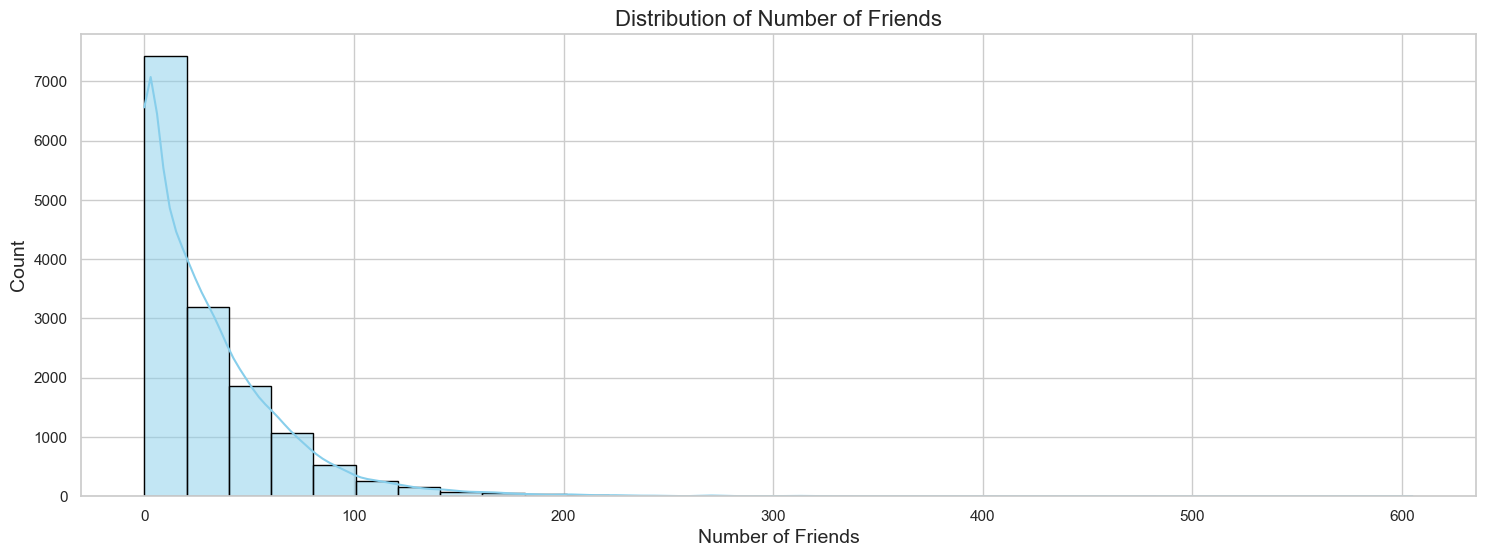

In [73]:
# Set the style
sns.set_style("whitegrid")

# Visualize the distribution of the number of friends
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='NumberOffriends', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Friends', fontsize=16)
plt.xlabel('Number of Friends', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

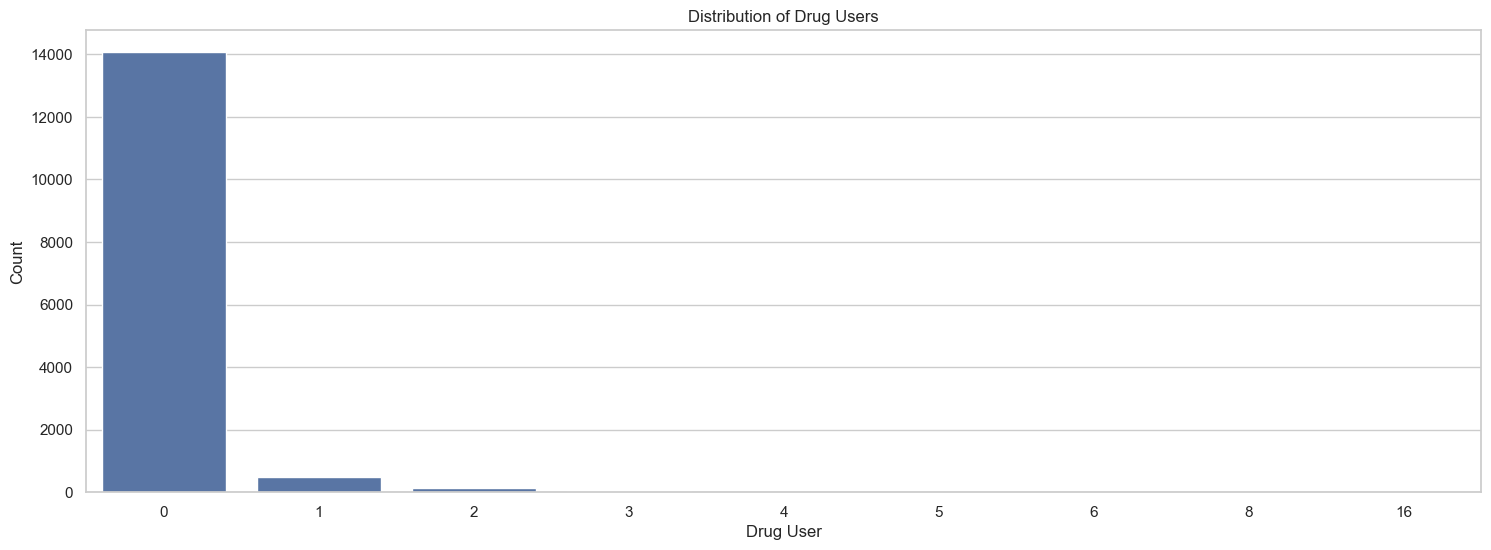

In [74]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='drugs')
plt.title('Distribution of Drug Users')
plt.xlabel('Drug User')
plt.ylabel('Count')
plt.show()

C:\Users\FADHIL\AppData\Local\Temp\ipykernel_50900\885691335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interests.values, y=interests.index, palette='viridis')


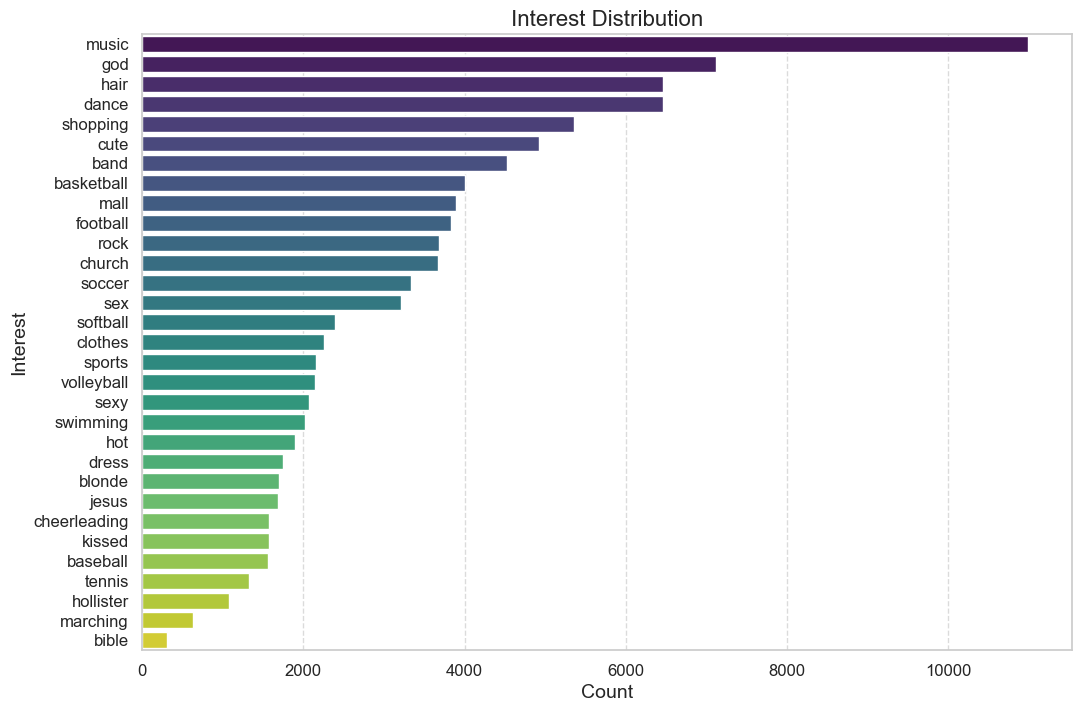

In [69]:
interests = df.iloc[:, 4:-6].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=interests.values, y=interests.index, palette='viridis')
plt.title('Interest Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Interest', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

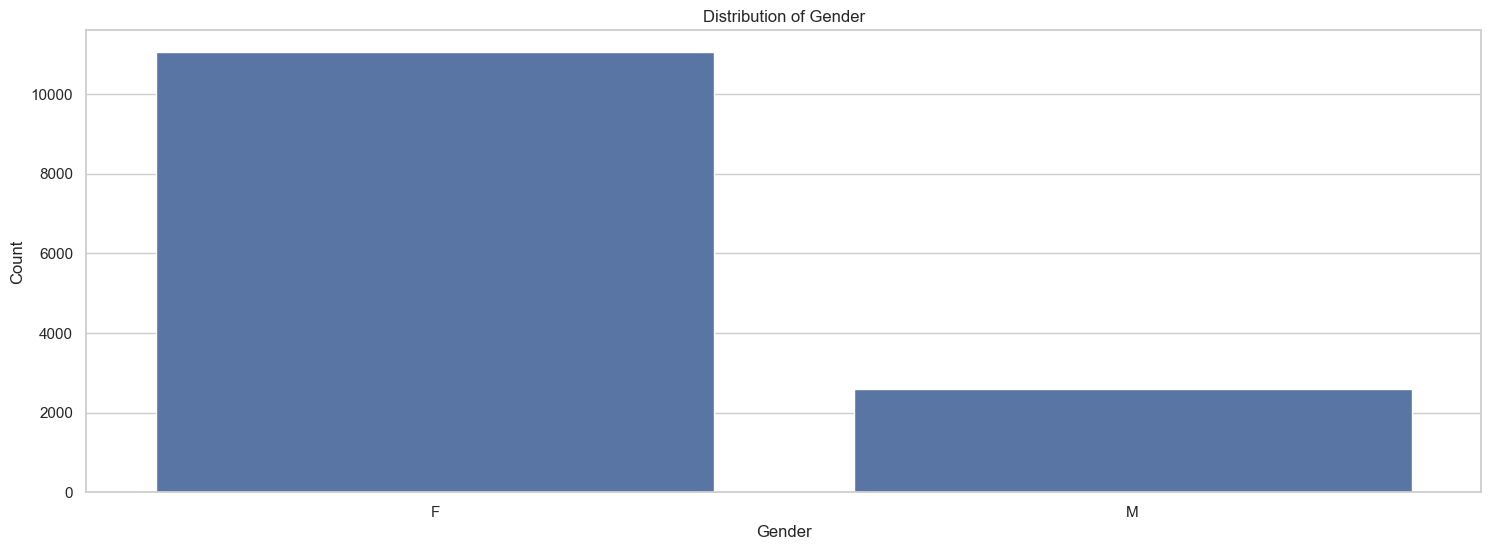

In [71]:
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

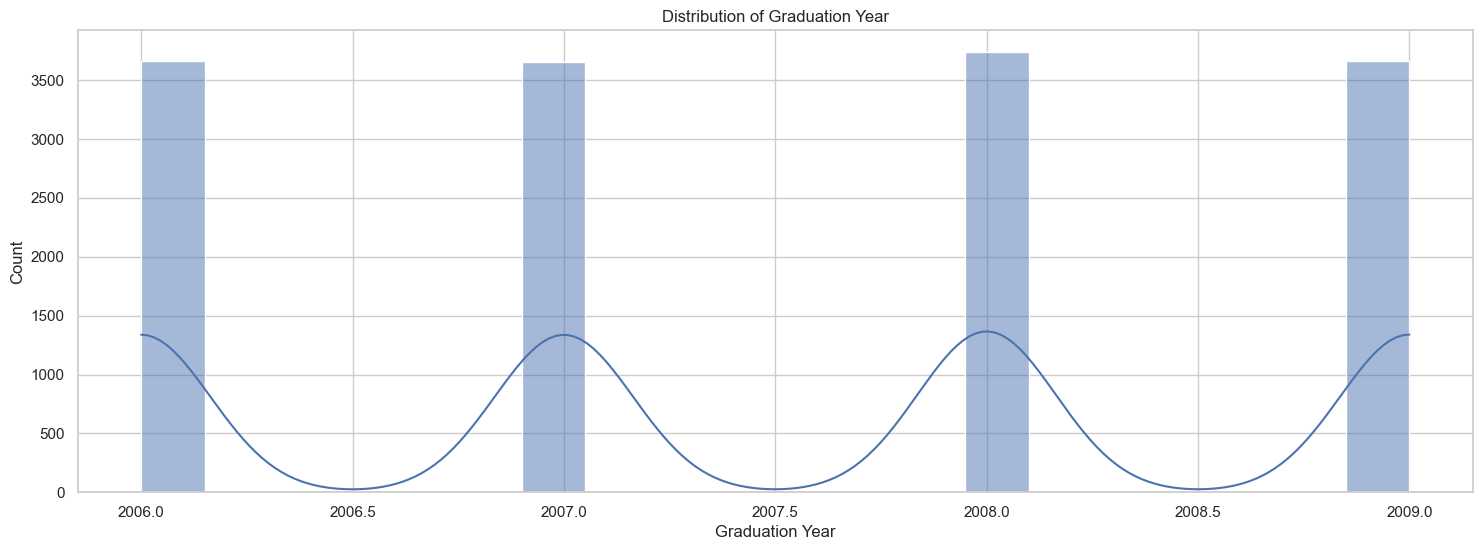

In [72]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='gradyear', bins=20, kde=True)
plt.title('Distribution of Graduation Year')
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.show()

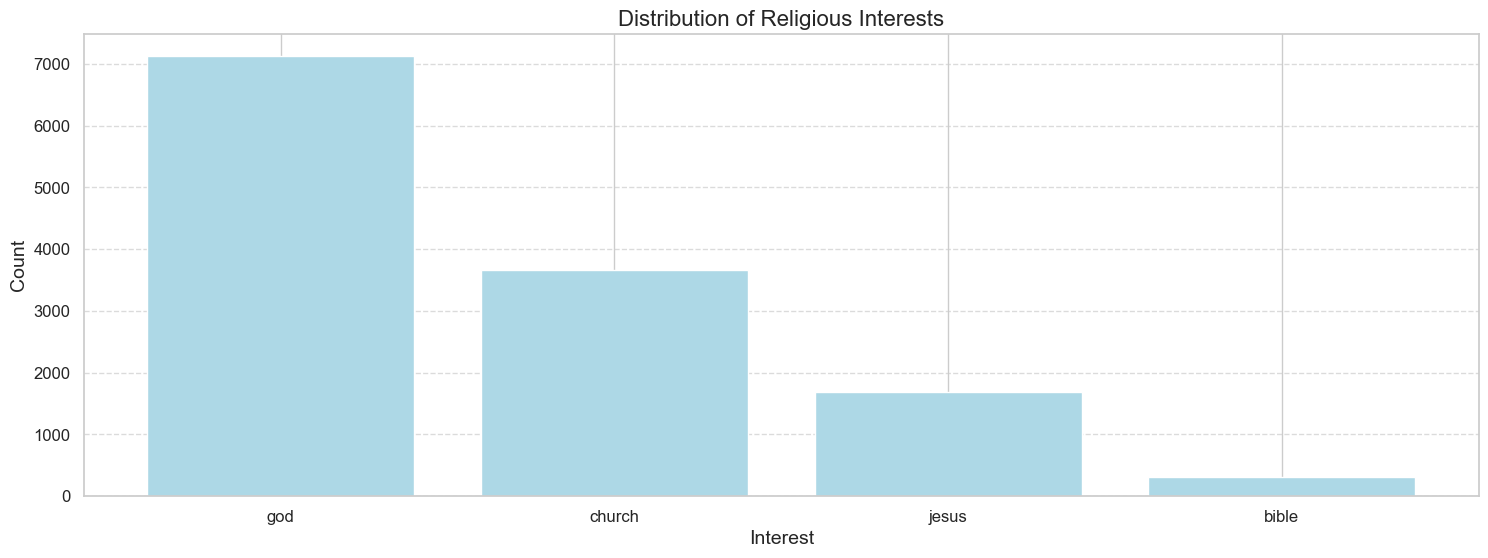

In [75]:
religious_interests = df[['god', 'church', 'jesus', 'bible']].sum()

plt.figure(figsize=(18, 6))
plt.bar(religious_interests.index, religious_interests.values, color='lightblue')
plt.title('Distribution of Religious Interests', fontsize=16)
plt.xlabel('Interest', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Feature Engineering

detect the outliers using a box plot below

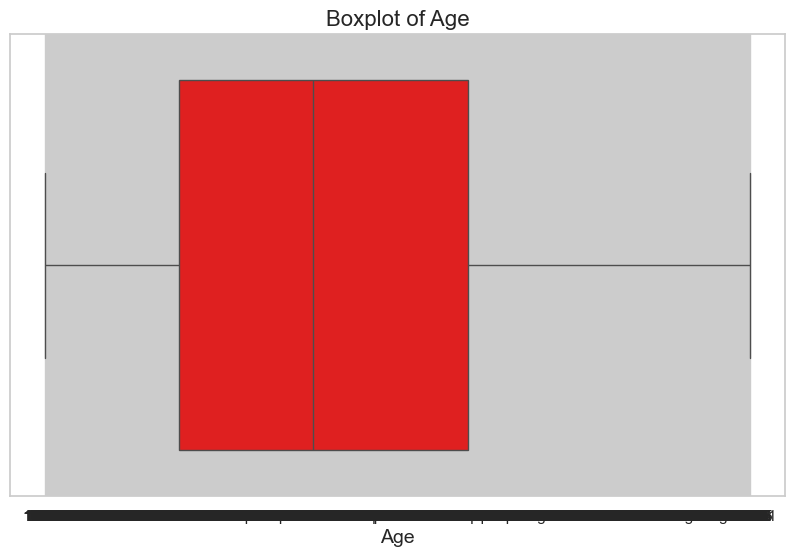

In [66]:
sns.set(style="whitegrid") 

plt.figure(figsize=(10, 6))  

sns.boxplot(x=data['age'], color='red')

plt.xlabel('Age', fontsize=14)
plt.title('Boxplot of Age', fontsize=16)

# Show the plot
plt.show()

In [27]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
print(iqr)

1.880134201954398


In [28]:
df1 = df[(df['age'] > (q1 - 1.5*iqr)) & (df['age'] < (q3 + 1.5*iqr))]

dikalikan dengan 1.5 adalah karena ini adalah aturan yang sering digunakan dalam statistik untuk mendeteksi nilai-nilai yang jauh dari distribusi normal. Nilai yang berada di luar rentang ini dianggap outliers karena terlalu jauh dari data utama, sehingga memerlukan perhatian khusus.

Jadi, dengan menggunakan faktor 1.5, kita bisa menyaring data yang secara signifikan lebih rendah atau lebih tinggi daripada sebagian besar data lainnya.

In [29]:
df1['age'].describe()

count    14545.000000
mean        17.377536
std          1.134909
min         13.719000
25%         16.517000
50%         17.421000
75%         18.385000
max         21.065000
Name: age, dtype: float64

Dari ringkasan di atas, kita bisa lihat bahwa setelah menangani data outlier, usia minimum adalah 13,719 tahun dan usia maksimum adalah 21,065 tahun.

In [30]:
df1.shape

(14545, 40)

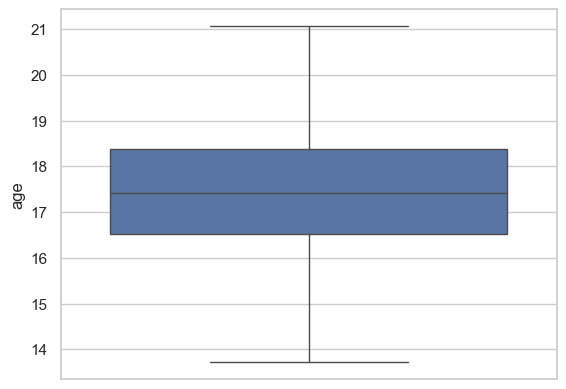

In [35]:
sns.boxplot(df1["age"])
plt.show()

From the above boxplot we observe that there are no outliers in the age column

In [31]:
names = df1.columns[4:40]
scaled_feature = df.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [32]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511000,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,19.010786,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [33]:
features = scaled_feature[names]

In [34]:
features.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,3,0,...,0,0,0,3,0,0,0,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [37]:
features = scaler.transform(features.values)

In [38]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,-0.248521,...,-0.042066,-0.372332,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,-0.220257,-0.176633
1,2007,F,17.410000,49,-0.341978,-0.367697,0.833284,-0.218698,-0.226005,1.558009,...,-0.042066,-0.372332,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,2.135977,-0.176633
2,2007,F,17.511000,41,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,-0.248521,...,-0.042066,1.035872,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,2.135977,2.661840
3,2006,F,19.010786,36,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,-0.248521,...,-0.042066,-0.372332,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,-0.220257,-0.176633
4,2008,F,16.657000,1,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,1.558009,...,-0.042066,-0.372332,-0.496201,5.896863,-0.203532,-0.185116,-0.307903,-0.261889,-0.220257,-0.176633


Convert object variable to numeric

In [39]:
def gender_to_numeric(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [40]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    3
1    2
2    2
3    2
4    2
Name: gender, dtype: int64

Checking the transformed values

In [41]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,3,18.400134,0,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,-0.248521,...,-0.042066,-0.372332,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,-0.220257,-0.176633
1,2007,2,17.410000,49,-0.341978,-0.367697,0.833284,-0.218698,-0.226005,1.558009,...,-0.042066,-0.372332,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,2.135977,-0.176633
2,2007,2,17.511000,41,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,-0.248521,...,-0.042066,1.035872,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,2.135977,2.661840
3,2006,2,19.010786,36,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,-0.248521,...,-0.042066,-0.372332,-0.496201,-0.317175,-0.203532,-0.185116,-0.307903,-0.261889,-0.220257,-0.176633
4,2008,2,16.657000,1,-0.341978,-0.367697,-0.243620,-0.218698,-0.226005,1.558009,...,-0.042066,-0.372332,-0.496201,5.896863,-0.203532,-0.185116,-0.307903,-0.261889,-0.220257,-0.176633


In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [43]:
model = kmeans.fit(scaled_feature)

c:\Users\FADHIL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\FADHIL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FADHIL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FADHIL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\FADHIL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\clus

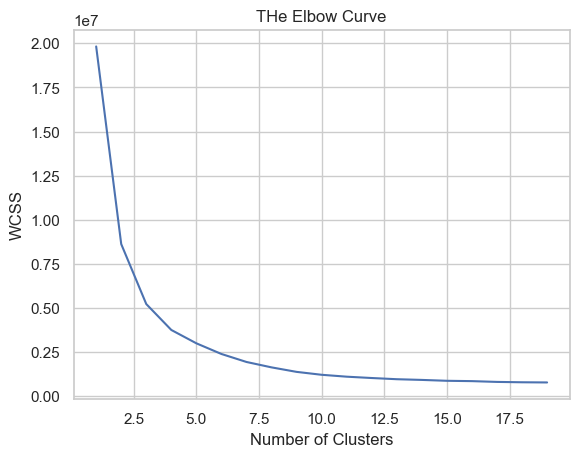

In [44]:
# Creating a function with KMeans to plot "The Elbow Curve"

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result.

In [45]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

c:\Users\FADHIL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [46]:
kmeans.labels_

array([0, 1, 3, ..., 3, 3, 3])

In [47]:
len(kmeans.labels_)

14720

In [48]:
df['cluster'] = kmeans.labels_

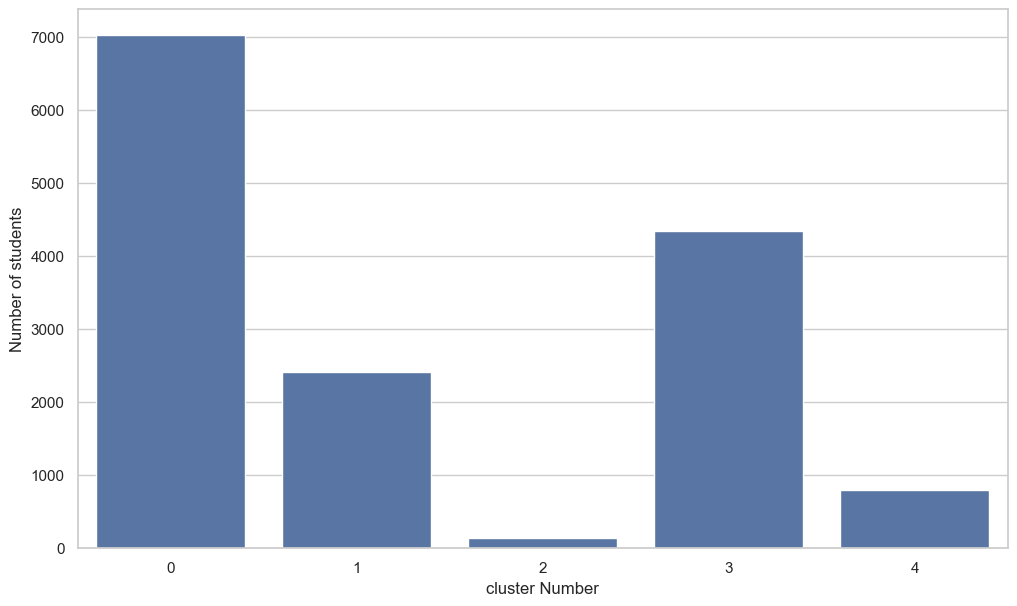

In [50]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=df.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

Let' see the number of students belonging to each cluster

In [52]:
size_array = list(df.groupby(['cluster']).count()['age'].values)
size_array

[7029, 2410, 147, 4341, 793]

Average Age in each cluster

In [53]:
# Calculate the mean age for each cluster
mean_age = df.groupby('cluster')['age'].mean()

# Print the mean age for each cluster in the desired format
for cluster, age in mean_age.items():
    print(f"Cluster {cluster}: {age:.2f} years")

Cluster 0: 18.06 years
Cluster 1: 17.70 years
Cluster 2: 17.68 years
Cluster 3: 18.02 years
Cluster 4: 17.83 years


In [55]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1, 'not disclosed':3})

In [56]:
df['gender'].value_counts()

gender
0    10993
1     2588
3     1139
Name: count, dtype: int64

Percentage of females in each cluster

In [57]:
# Calculate the percentage of females in each cluster
percentage_female = df[df['gender'] == 0].groupby('cluster').size() / df.groupby('cluster').size() * 100

# Print the percentage of females in each cluster in a readable format
for cluster, percentage in percentage_female.items():
    print(f"Cluster {cluster}: {percentage:.2f}% females")

Cluster 0: 72.24% females
Cluster 1: 78.13% females
Cluster 2: 87.07% females
Cluster 3: 75.47% females
Cluster 4: 79.19% females


Average number of friends in each cluster

In [62]:
# Calculate the average number of friends in each cluster
mean_friends = df.groupby('cluster')['NumberOffriends'].mean()

# Print the average number of friends in each cluster in a readable format
for cluster, avg_friends in mean_friends.items():
    print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")

Cluster 0: Average number of friends = 5.66
Cluster 1: Average number of friends = 63.38
Cluster 2: Average number of friends = 208.65
Cluster 3: Average number of friends = 31.23
Cluster 4: Average number of friends = 111.54


In [63]:
cluster_analysis = pd.DataFrame({
    'Mean Age': mean_age,
    'Percentage Female': percentage_female,
    'Mean Number of Friends': mean_friends,
    'Number of Students': size_array  
})

print("Cluster Analysis:")
for cluster, row in cluster_analysis.iterrows():
    print(f"Cluster {cluster}:")
    print(f"  Mean Age: {row['Mean Age']:.2f} years")
    print(f"  Percentage Female: {row['Percentage Female']:.2f}%")
    print(f"  Mean Number of Friends: {row['Mean Number of Friends']:.2f}")
    print(f"  Number of Students: {row['Number of Students']}")
    print()  

Cluster Analysis:
Cluster 0:
  Mean Age: 18.06 years
  Percentage Female: 72.24%
  Mean Number of Friends: 5.66
  Number of Students: 7029.0

Cluster 1:
  Mean Age: 17.70 years
  Percentage Female: 78.13%
  Mean Number of Friends: 63.38
  Number of Students: 2410.0

Cluster 2:
  Mean Age: 17.68 years
  Percentage Female: 87.07%
  Mean Number of Friends: 208.65
  Number of Students: 147.0

Cluster 3:
  Mean Age: 18.02 years
  Percentage Female: 75.47%
  Mean Number of Friends: 31.23
  Number of Students: 4341.0

Cluster 4:
  Mean Age: 17.83 years
  Percentage Female: 79.19%
  Mean Number of Friends: 111.54
  Number of Students: 793.0



C:\Users\FADHIL\AppData\Local\Temp\ipykernel_50900\2193581719.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


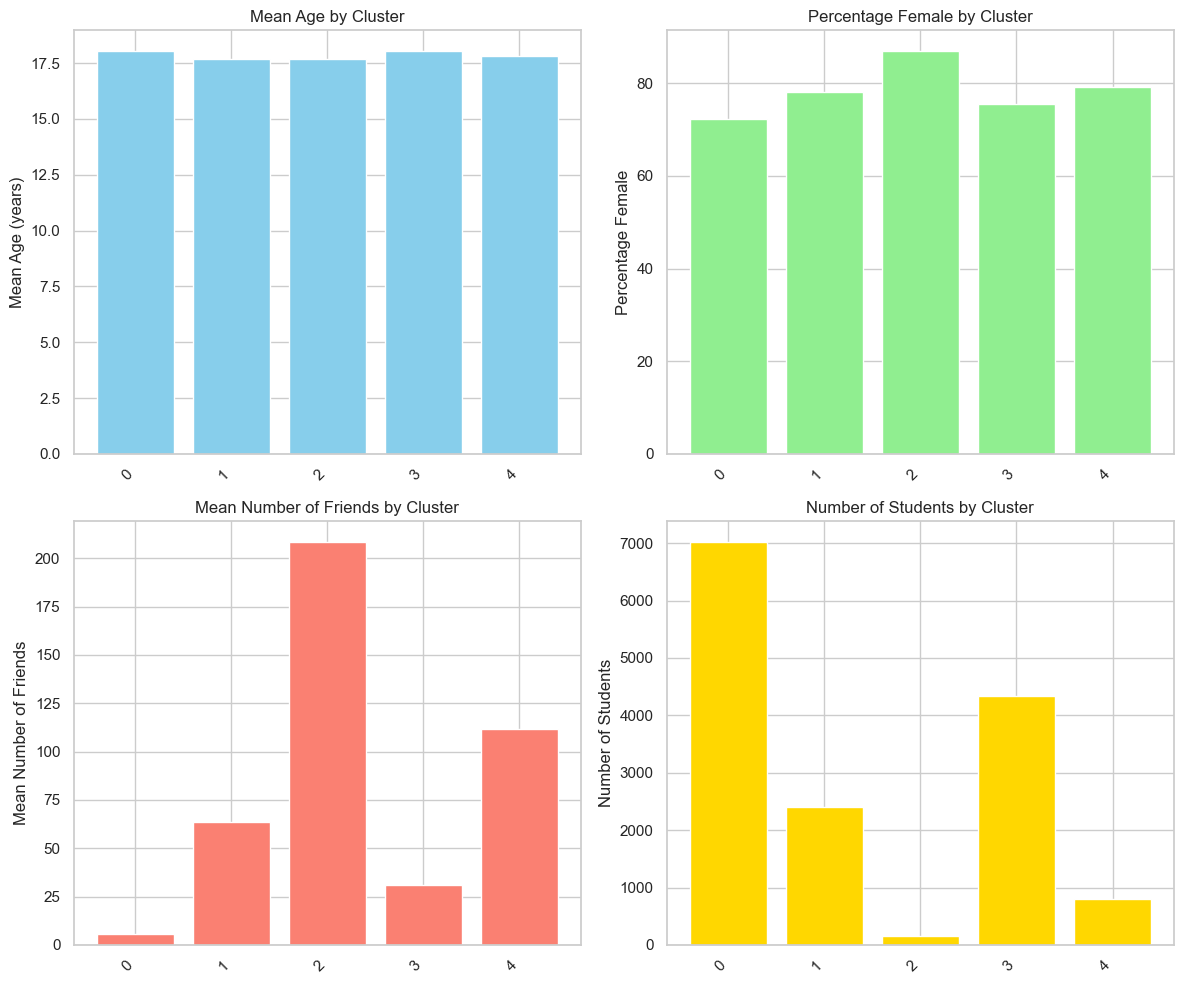

In [64]:
clusters = cluster_analysis.index

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Mean Age
axs[0, 0].bar(clusters, cluster_analysis['Mean Age'], color='skyblue')
axs[0, 0].set_title('Mean Age by Cluster')
axs[0, 0].set_ylabel('Mean Age (years)')

# Percentage Female
axs[0, 1].bar(clusters, cluster_analysis['Percentage Female'], color='lightgreen')
axs[0, 1].set_title('Percentage Female by Cluster')
axs[0, 1].set_ylabel('Percentage Female')

# Mean Number of Friends
axs[1, 0].bar(clusters, cluster_analysis['Mean Number of Friends'], color='salmon')
axs[1, 0].set_title('Mean Number of Friends by Cluster')
axs[1, 0].set_ylabel('Mean Number of Friends')

# Number of Students
axs[1, 1].bar(clusters, cluster_analysis['Number of Students'], color='gold')
axs[1, 1].set_title('Number of Students by Cluster')
axs[1, 1].set_ylabel('Number of Students')

# Rotate x-axis labels for better readability
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Describe clusters characteristics

In [65]:
def describe_clusters(df):
   
    # Describe cluster characteristics
    cluster_analysis = df.groupby('cluster').mean().T
    print("Cluster Characteristics:")
    cluster_df = pd.DataFrame(cluster_analysis)
    
    return cluster_df

describe_clusters(df)

Cluster Characteristics:


cluster,0,1,2,3,4
gradyear,2007.436620,2007.622822,2007.897959,2007.497812,2007.682219
gender,0.434059,0.383817,0.251701,0.385856,0.399748
age,18.056222,17.697091,17.678432,18.019938,17.828481
NumberOffriends,5.659696,63.376349,208.646259,31.232896,111.537201
basketball,0.224214,0.333610,0.312925,0.301774,0.337957
football,0.235880,0.290871,0.299320,0.272748,0.308953
soccer,0.199175,0.269295,0.231293,0.240267,0.257251
softball,0.123773,0.228631,0.149660,0.167243,0.284994
volleyball,0.107697,0.200000,0.258503,0.165169,0.189155
swimming,0.115948,0.162241,0.217687,0.155264,0.142497


# Recommendation for marketing department

👉Targeting Female-Centric Products:¶
Clusters 1, 2, and 3 have a higher percentage of females compared to the overall population. Therefore, products or advertisements that specifically target teenage girls may perform well within these clusters. Products related to fashion, beauty, socializing, or lifestyle may resonate more with these clusters.

👉Understanding Male-Centric Interests:
Clusters 0 and 4 have a higher percentage of males. Understanding the interests and preferences of teenage boys within these clusters can help develop marketing campaigns tailored to their needs. Products related to sports, technology, gaming, or adventure may appeal more to these clusters.

👉Fashion and Retail Promotions:
Clusters 2 and 3 show a higher interest in shopping, suggesting that advertising campaigns or promotions related to shopping might be more effective for these clusters.

👉Sports and Lifestyle Brand Partnerships:
Collaborate with sports brands or organize sports-related events and activities to appeal to clusters showing a strong interest in sports (e.g., Clusters 3 and 4).